# Binary sequences

In [1]:
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pylab as plt
import komm

## Barker sequence

In [2]:
def barker_demo(index):
    length = [2, 3, 4, 5, 7, 11, 13][index]
    barker = komm.BarkerSequence(length=length)
    shifts = np.arange(-2*length + 1, 2*length)
    _, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))
    ax0.stem(np.arange(barker.length), barker.polar_sequence)
    ax0.set_title(repr(barker))
    ax0.set_xlabel('$n$')
    ax0.set_ylabel('$a[n]$')
    ax0.set_xticks(np.arange(length))
    ax0.set_yticks([-1, 0, 1])
    ax1.stem(shifts, barker.autocorrelation(shifts))
    ax1.set_title('Autocorrelation')
    ax1.set_xlabel('$\\ell$')
    ax1.set_ylabel('$R[\\ell]$')
    ax1.set_xticks([-length + 1, 0, length - 1])
    ax1.set_yticks(np.arange(-1, length + 1))
    plt.show()

interact(barker_demo, index=(0, 6));

## Walsh-Hadamard sequence

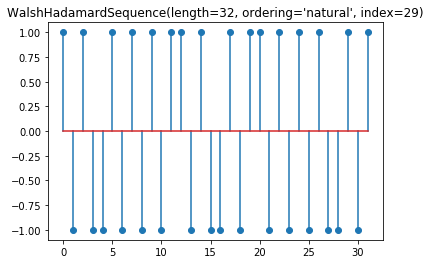

In [3]:
walsh_hadamard = komm.WalshHadamardSequence(length=32, index=29)
fig = plt.figure()
ax = plt.axes()
ax.stem(np.arange(walsh_hadamard.length), walsh_hadamard.polar_sequence)
ax.set_title(repr(walsh_hadamard))
plt.show()

## Linear-feedback shift register (LFSR) sequence

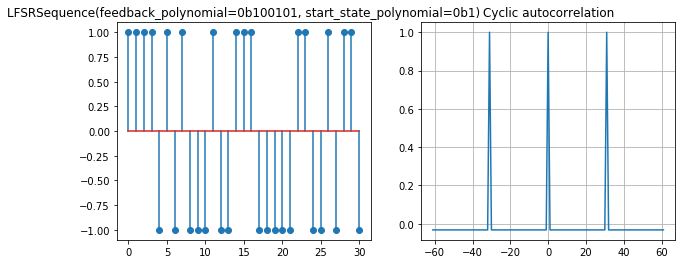

In [4]:
lfsr = komm.LFSRSequence(0b100101)
shifts = np.arange(-2*lfsr.length + 1, 2*lfsr.length)
cyclic_acorr = lfsr.cyclic_autocorrelation(shifts, normalized=True)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))

ax0.stem(range(lfsr.length), lfsr.polar_sequence)
ax0.set_title(repr(lfsr))

ax1.plot(shifts, cyclic_acorr)
ax1.set_title('Cyclic autocorrelation')
ax1.grid(True)

plt.show()